<a href="https://colab.research.google.com/github/oceanfishYU/Python_practise/blob/main/SVM0511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x=np.array([3, 5, 9, 11, 2, 4, 7, 8])
y=np.array([10, 12, 6, 2, 9, 10, 4, 1])
g=np.array([1, 1, 2, 2, 3, 3, 4, 4])

g是用來分群的，下面點的顏色會用g來分

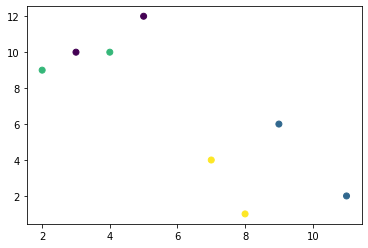

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c=g)

顏色也可以直接用1,2,3...，他們會代表某種顏色

#SVM

##1.訓練模型

In [ ]:
from sklearn.svm import SVC

sklearn.svm有很多模型，我們從sklearn.svml中取出SVM這個模型

In [ ]:
model=SVC()

讓model=SVC這個模型

In [ ]:
x.reshape(-1,1)

array([[ 3],
       [ 5],
       [ 9],
       [11],
       [ 2],
       [ 4],
       [ 7],
       [ 8]])

把x改成二維的，因為等等要把xy合在一起變成二微陣列，二微陣列才可以丟進模型裡

In [ ]:
y.reshape(-1,1)

array([[10],
       [12],
       [ 6],
       [ 2],
       [ 9],
       [10],
       [ 4],
       [ 1]])

把y改成二維的，因為等等要把xy合在一起變成二微陣列，二微陣列才可以丟進模型裡

In [ ]:
x_y = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)] , axis=1)
x_y

array([[ 3, 10],
       [ 5, 12],
       [ 9,  6],
       [11,  2],
       [ 2,  9],
       [ 4, 10],
       [ 7,  4],
       [ 8,  1]])

把x和y合併

In [ ]:
g.reshape(-1,1)

array([[1],
       [1],
       [2],
       [2],
       [3],
       [3],
       [4],
       [4]])

把g也改成二維的，它等等要丟進模型當正確答案

In [ ]:
model.fit(x_y, g.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

把x_y丟進去訓練，g是正確答案

x=np.array([3, 5, 9, 11, 2, 4, 7, 8])
y=np.array([10, 12, 6, 2, 9, 10, 4, 1])
g=np.array([1, 1, 2, 2, 3, 3, 4, 4])

錯誤:x_y = [[3],[5],[9]...[10],[12]...]

正確:x_y = [[3,10],[5,12]...]   g=[[1],[1],[2]...]

In [ ]:
model.predict([[5,12]])

array([1])

model預測[[5,12]]的結果為1

In [ ]:
pg=model.predict(x_y)
pg

array([3, 1, 2, 2, 3, 3, 4, 4])

model預測x_y[連結文字]的結果為[3, 1, 2, 2, 3, 3, 4, 4]

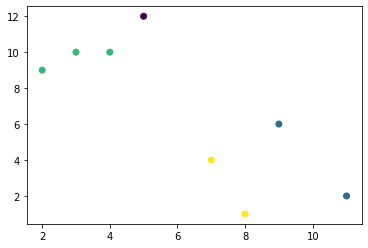

In [ ]:
plt.scatter(x,y,c=pg)

把x,y的點畫在圖上，顏色就是pg(model預測的結果)，可以看到[3,10]那個點預測錯了，他預測是3，但正確答案是1

##3.劃出區域範圍

In [ ]:
new_x_y = np.array([(i,j) for i in np.arange(0,12,0.1) for j in np.arange(0,12,0.1)])
new_x_y

array([[ 0. ,  0. ],
       [ 0. ,  0.1],
       [ 0. ,  0.2],
       ...,
       [11.9, 11.7],
       [11.9, 11.8],
       [11.9, 11.9]])

new_x_y等於陣列[i,j]，i裡面放入np.arange(0,12,0.1)(從0到12每次增加0.1)，j裡面放入np.arange(0,12,0.1)(從0到12每次增加0.1)，np.arange才可以增加小數，range只能增加整數，之所以是加0.1是因為這樣畫出來點會比較多比較密，比較能看出區域，如果是1的話下面的圖會變成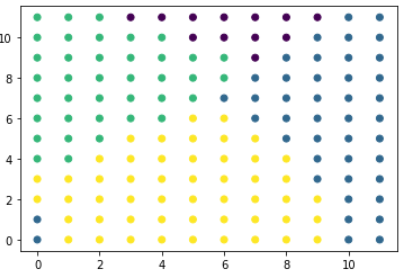

In [ ]:
model.predict(new_x_y)

array([2, 2, 2, ..., 2, 2, 2])

用model來預測new_x_y

In [ ]:
new_x,new_y = np.hsplit(new_x_y,[1])

把new_x_y從1的位置切開，分別變成new_x和new_y，因為等等要畫圖

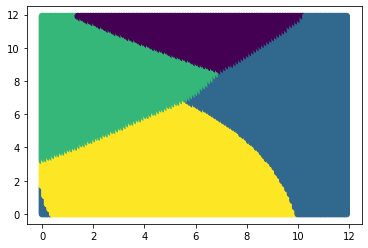

In [ ]:
plt.scatter(new_x , new_y , c=model.predict(new_x_y))

把new_x和new_y畫在圖上，然後顏色用model預測new_x_y的結果，這樣就能畫出區域了

##3.評估模型

In [ ]:
model.score(x_y , g.reshape(-1,1))

0.875

用score評估模型的分數為0.875